# Task 1

---

## Web scraping and analysis

This Jupyter notebook includes some code to get you started with web scraping. We will use a package called `BeautifulSoup` to collect the data from the web. Once you've collected your data and saved it into a local `.csv` file you should start with your analysis.

### Scraping data from Skytrax

If you visit [https://www.airlinequality.com] you can see that there is a lot of data there. For this task, we are only interested in reviews related to British Airways and the Airline itself.

If you navigate to this link: [https://www.airlinequality.com/airline-reviews/british-airways] you will see this data. Now, we can use `Python` and `BeautifulSoup` to collect all the links to the reviews and then to collect the text data on each of the individual review links.

In [1]:
import string

import requests
from bs4 import BeautifulSoup
import pandas as pd

In [2]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 10
page_size = 100

reviews = []

# for i in range(1, pages + 1):
for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())
    
    print(f"   ---> {len(reviews)} total reviews")

Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews


In [3]:
df = pd.DataFrame()
df["reviews"] = reviews
df.head()

,reviews
0,"✅ Trip Verified | I had a flight from Miami, F..."
1,✅ Trip Verified | We started our day with BA ...
2,✅ Trip Verified | I fly British Airways weekl...
3,Not Verified | Everything was ok until our co...
4,Not Verified | My initial flight was cancelle...


In [5]:
df.to_csv("Data/BA_reviews.csv")

Congratulations! Now you have your dataset for this task! The loops above collected 1000 reviews by iterating through the paginated pages on the website. However, if you want to collect more data, try increasing the number of pages!

 The next thing that you should do is clean this data to remove any unnecessary text from each of the rows. For example, "✅ Trip Verified" can be removed from each row if it exists, as it's not relevant to what we want to investigate.

In [200]:
import re
import string
import collections
from nltk import WordNetLemmatizer
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from nltk import PorterStemmer
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [115]:
data= pd.read_csv("Data/BA_reviews.csv")

In [185]:
# Preprocessing
lemmatizer = WordNetLemmatizer()
stemmer = PorterStemmer()
tokenizer = RegexpTokenizer(r'\w+')
def preprocess(text):
    text = str(text).lower()
    if '|' in text:
        text = text.split("|")[1]
        text = text.translate(str.maketrans('', '', string.punctuation)).lower()
        text = re.sub('[0-9]+', '', text)
        tokenizer = RegexpTokenizer(r'\w+')
        tokens = tokenizer.tokenize(text)
        filtered_words = [w for w in tokens if len(w) >2 if w not in stopwords.words('english')]
        stem_words=[stemmer.stem(w) for w in filtered_words]
        lemm_words =[lemmatizer.lemmatize(w) for w in stem_words]
        return " ".join(lemm_words)
        
    else:
        return text

data['pre_review'] = data['reviews'].map(lambda s: preprocess(s))



In [202]:
from itertools import chain

pre_review_notflat = [a.split() for a in data['pre_review']]
counter = Counter(chain.from_iterable(pre_review_notflat))
#freq = [list(i) for i in counter.items()]
#print(freq)
print(counter)


Counter({'flight': 2125, 'seat': 984, 'servic': 743, 'time': 608, 'london': 585, 'hour': 556, 'crew': 455, 'food': 452, 'get': 447, 'airlin': 431, 'one': 431, 'class': 422, 'board': 416, 'good': 413, 'british': 410, 'airway': 410, 'staff': 405, 'busi': 404, 'cabin': 386, 'book': 375, 'would': 373, 'custom': 341, 'check': 339, 'fli': 332, 'arriv': 325, 'day': 313, 'heathrow': 309, 'cancel': 309, 'call': 299, 'delay': 292, 'offer': 286, 'back': 285, 'travel': 283, 'passeng': 281, 'even': 277, 'economi': 270, 'could': 267, 'bag': 262, 'airport': 261, 'told': 254, 'plane': 250, 'first': 249, 'use': 244, 'experi': 241, 'drink': 233, 'return': 223, 'meal': 221, 'ask': 215, 'help': 215, 'minut': 213, 'club': 208, 'wait': 204, 'new': 201, 'loung': 199, 'tri': 198, 'refund': 192, 'aircraft': 189, 'make': 186, 'luggag': 186, 'got': 186, 'like': 185, 'work': 182, 'two': 175, 'ticket': 175, 'never': 174, 'anoth': 174, 'chang': 170, 'due': 167, 'take': 166, 'also': 165, 'well': 163, 'still': 163, '

In [223]:
wordcloud = WordCloud(width=800, height=800,repeat=True, max_words=200).generate_from_frequencies(counter)

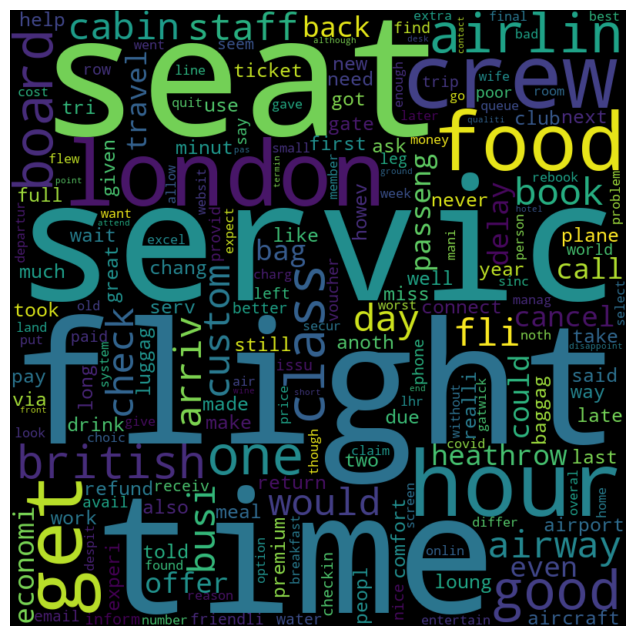

<Figure size 640x480 with 0 Axes>

In [228]:
plt.figure(figsize=(8, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()
#plt.savefig(f'wordcloud.png',dpi = 300)